In [176]:
# Setup
import pandas as pd
import numpy as np
from io import BytesIO
import requests
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

1. Load in the Member Benefit data.

In [177]:
url = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_20.zip'

response = requests.get(url)

# Unzip the content of the response call
with zipfile.ZipFile(BytesIO(response.content)) as z:
    csv_filename = z.namelist()[0]
    
    # Let's convert to a pandas DataFrame
    member_benefit = pd.read_csv(z.open(csv_filename))

# Display df info
member_benefit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114641 entries, 0 to 114640
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DESYNPUF_ID               114641 non-null  object 
 1   BENE_BIRTH_DT             114641 non-null  int64  
 2   BENE_DEATH_DT             1830 non-null    float64
 3   BENE_SEX_IDENT_CD         114641 non-null  int64  
 4   BENE_RACE_CD              114641 non-null  int64  
 5   BENE_ESRD_IND             114641 non-null  object 
 6   SP_STATE_CODE             114641 non-null  int64  
 7   BENE_COUNTY_CD            114641 non-null  int64  
 8   BENE_HI_CVRAGE_TOT_MONS   114641 non-null  int64  
 9   BENE_SMI_CVRAGE_TOT_MONS  114641 non-null  int64  
 10  BENE_HMO_CVRAGE_TOT_MONS  114641 non-null  int64  
 11  PLAN_CVRG_MOS_NUM         114641 non-null  int64  
 12  SP_ALZHDMTA               114641 non-null  int64  
 13  SP_CHF                    114641 non-null  i

In [178]:
# Let's reformat the BENE_BIRTH_DT column to YYY-MM-DD

member_benefit['BENE_BIRTH_DT'] = member_benefit['BENE_BIRTH_DT'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').strftime('%Y-%m-%d'))
print(member_benefit['BENE_BIRTH_DT'].head())

0    1919-07-01
1    1936-05-01
2    1931-04-01
3    1942-05-01
4    1935-04-01
Name: BENE_BIRTH_DT, dtype: object


In [179]:
# BENE_BIRTH_DT contains a large number of NaN
# We will adjust the lambda function to account for this
member_benefit['BENE_BIRTH_DT'] = member_benefit['BENE_BIRTH_DT'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d', errors='coerce').strftime('%Y-%m-%d')
    if pd.notnull(x) and '-' not in str(x)  # Check if the value is not null and doesn't contain '-'
    else x
)

In [180]:
# Inspect summary stats
member_benefit.describe()


,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
count,1830.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,...,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00
mean,20090634.28,1.55,1.28,25.73,366.37,11.23,11.11,3.33,9.07,1.77,...,1.95,2158.44,247.42,101.53,762.03,234.91,30.71,1337.59,374.56,21.11
std,344.15,0.50,0.75,15.57,266.03,2.93,3.09,5.30,4.87,0.42,...,0.22,7167.90,781.24,1951.36,1876.65,539.39,414.68,1525.17,423.54,96.01
min,20090101.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,-8000.00,0.00,0.00,-90.00,0.00,0.00,0.00,0.00,0.00
25%,20090301.00,1.00,1.00,11.00,141.00,12.00,12.00,0.00,6.00,2.00,...,2.00,0.00,0.00,0.00,0.00,0.00,0.00,90.00,20.00,0.00
50%,20090601.00,2.00,1.00,25.00,330.00,12.00,12.00,0.00,12.00,2.00,...,2.00,0.00,0.00,0.00,120.00,30.00,0.00,900.00,250.00,0.00
75%,20090901.00,2.00,1.00,39.00,550.00,12.00,12.00,12.00,12.00,2.00,...,2.00,0.00,0.00,0.00,800.00,240.00,0.00,1980.00,560.00,0.00
max,20091201.00,2.00,5.00,54.00,999.00,12.00,12.00,12.00,12.00,2.00,...,2.00,136000.00,39340.00,86000.00,47010.00,11480.00,21000.00,16930.00,4410.00,2400.00


2.	Data Cleaning: \
The beneficiary summary file has several chronic illness columns for each member


In [181]:
# There are 11 Chronic Condition columns
# Let's gather them up and check domains, nulls etc.

chronic = member_benefit[['SP_ALZHDMTA',     # Alzheimer or related disorder
                          'SP_CHF',	         # Heart Failure
                          'SP_CHRNKIDN',	 # Chronic Kidney Disease
                          'SP_CNCR',	     # Cancer
                          'SP_COPD',	     # Chronic Obstructive Pulmonary Disease
                          'SP_DEPRESSN',     # Depression
                          'SP_DIABETES',	 # Diabetes
                          'SP_ISCHMCHT',	 # Ischemic Heart Disease
                          'SP_OSTEOPRS',	 # Osteoporosis
                          'SP_RA_OA',	     # rheumatoid arthritis and osteoarthritis (RA/OA)
                          'SP_STRKETIA'      # Stroke/transient IschemicAttack
]]

chronic.describe()

,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA
count,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00,114641.00
mean,1.77,1.66,1.79,1.92,1.84,1.75,1.58,1.52,1.81,1.83,1.95
std,0.42,0.47,0.41,0.27,0.36,0.43,0.49,0.50,0.39,0.38,0.22
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,1.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,2.00
50%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
75%,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00
max,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


In [182]:
# First, let's generate a new column called 'Diagnoses_all' with the concatenated diagnoses
member_benefit['Diagnoses_all'] = member_benefit.apply(lambda row: ', '.join([column for column in chronic if row[column] == 2]), axis=1)

# Next, we can reclassify members with 3 or more chronic conditions as "Multiple"
# In the interests of completeness, this will be done in a new column 'Diagnoses' and we will retain 'Diagnoses_all' for later use if needed
# Note, we need to add an exception for cases where all illness indicators = 1
member_benefit['Diagnoses'] = member_benefit['Diagnoses_all'].apply(lambda x: 'Multiple' if x.count(',') >= 3 else 'No Chronic Condition' if x == '' else x)

member_benefit['Diagnoses'].unique()



array(['Multiple', 'SP_CHRNKIDN, SP_COPD, SP_STRKETIA',
       'SP_ALZHDMTA, SP_CHRNKIDN, SP_STRKETIA',
       'SP_ALZHDMTA, SP_CHF, SP_STRKETIA', 'SP_CHF, SP_CNCR, SP_STRKETIA',
       'SP_CNCR, SP_STRKETIA', 'SP_COPD, SP_DEPRESSN, SP_STRKETIA',
       'SP_ALZHDMTA', 'SP_ISCHMCHT, SP_OSTEOPRS, SP_STRKETIA',
       'SP_CNCR, SP_OSTEOPRS', 'SP_STRKETIA',
       'SP_COPD, SP_OSTEOPRS, SP_STRKETIA',
       'SP_CNCR, SP_OSTEOPRS, SP_RA_OA', 'SP_CHRNKIDN, SP_STRKETIA',
       'SP_DEPRESSN, SP_OSTEOPRS, SP_RA_OA',
       'SP_ALZHDMTA, SP_RA_OA, SP_STRKETIA', 'SP_RA_OA, SP_STRKETIA',
       'SP_CNCR, SP_COPD, SP_OSTEOPRS',
       'SP_OSTEOPRS, SP_RA_OA, SP_STRKETIA', 'SP_RA_OA',
       'SP_CNCR, SP_OSTEOPRS, SP_STRKETIA', 'SP_OSTEOPRS',
       'SP_CNCR, SP_RA_OA', 'SP_CNCR, SP_DEPRESSN, SP_STRKETIA',
       'SP_CNCR, SP_COPD, SP_RA_OA', 'SP_CNCR, SP_COPD, SP_STRKETIA',
       'SP_CNCR, SP_DEPRESSN', 'SP_CNCR, SP_RA_OA, SP_STRKETIA',
       'SP_CHF, SP_DEPRESSN, SP_STRKETIA',
       'SP_CNCR, 

In [183]:
# Read in Claims data
url = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.zip'

response = requests.get(url)

# Unzip the content of the response call
with zipfile.ZipFile(BytesIO(response.content)) as z:
    csv_filename = z.namelist()[0]
    
    # Let's convert to a pandas DataFrame
    claims = pd.read_csv(z.open(csv_filename))

# Display df info
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790044 entries, 0 to 790043
Data columns (total 76 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   DESYNPUF_ID                     790044 non-null  object 
 1   CLM_ID                          790044 non-null  int64  
 2   SEGMENT                         790044 non-null  int64  
 3   CLM_FROM_DT                     779016 non-null  float64
 4   CLM_THRU_DT                     779016 non-null  float64
 5   PRVDR_NUM                       790044 non-null  object 
 6   CLM_PMT_AMT                     790044 non-null  float64
 7   NCH_PRMRY_PYR_CLM_PD_AMT        790044 non-null  float64
 8   AT_PHYSN_NPI                    772604 non-null  float64
 9   OP_PHYSN_NPI                    133737 non-null  float64
 10  OT_PHYSN_NPI                    255940 non-null  float64
 11  NCH_BENE_BLOOD_DDCTBL_LBLTY_AM  790044 non-null  float64
 12  ICD9_DGNS_CD_1  

In [184]:
claims.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00001C24EE7B06AC,684562269783396,1,20090404.00,20090404.00,1100SK,200.00,0.00,1298826910.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00001C24EE7B06AC,684012269893042,1,20100310.00,20100310.00,1100SK,500.00,0.00,1298826910.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000072CF62193213,684012269540703,1,20080130.00,20080130.00,1000AH,50.00,0.00,8929521324.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000072CF62193213,684472269696971,1,20080301.00,20080301.00,1000AH,70.00,0.00,8382687693.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000072CF62193213,684122269778934,1,20080322.00,20080322.00,3400HK,40.00,0.00,4404237062.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
## Join claims & benefit data
# We will use an inner join to grab records with matching 'DESYNPUF_ID' values in both tables.

merged_df = pd.merge(member_benefit, claims, how = 'inner', on = 'DESYNPUF_ID')

merged_df.describe()

,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,...,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,ICD9_PRCDR_CD_1,NCH_BENE_PTB_DDCTBL_AMT,NCH_BENE_PTB_COINSRNC_AMT,HCPCS_CD_45
count,6856.00,788049.00,788049.00,788049.00,788049.00,788049.00,788049.00,788049.00,788049.00,788049.00,...,788049.00,788049.00,770812.00,133435.00,255711.00,788049.00,204.00,788049.00,788049.00,0.00
mean,20090714.65,1.58,1.26,25.80,377.84,11.93,11.94,3.50,10.06,1.61,...,282.47,10.42,4973453107.84,4939182878.03,4902858475.86,0.01,6264.65,2.81,83.76,NaN
std,340.75,0.49,0.72,15.14,267.72,0.92,0.79,5.38,4.02,0.49,...,569.40,234.97,2877336533.42,2885563289.64,2891679198.53,2.03,3002.83,15.51,178.68,NaN
min,20090101.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,...,-100.00,0.00,102408.00,1005544.00,102408.00,0.00,54.00,0.00,0.00,NaN
25%,20090401.00,1.00,1.00,11.00,141.00,12.00,12.00,0.00,12.00,1.00,...,40.00,0.00,2520574560.00,2471200529.00,2437454556.00,0.00,3893.00,0.00,0.00,NaN
50%,20090701.00,2.00,1.00,25.00,350.00,12.00,12.00,0.00,12.00,2.00,...,80.00,0.00,4904972228.00,4866311724.00,4781419604.00,0.00,5672.50,0.00,20.00,NaN
75%,20091001.00,2.00,1.00,39.00,570.00,12.00,12.00,12.00,12.00,2.00,...,200.00,0.00,7504972949.00,7470941081.00,7494004763.00,0.00,9028.50,0.00,70.00,NaN
max,20091201.00,2.00,5.00,54.00,999.00,12.00,12.00,12.00,12.00,2.00,...,3300.00,14000.00,9999658129.00,9999615484.00,9999885698.00,900.00,9955.00,200.00,1100.00,NaN


3.	Basic Summaries

In [186]:
## What is the distribution of races?

# First, lets create a mapping to make the analysis more interpretable
# Mapping based on : https://www.cms.gov/files/document/de-10-codebook.pdf-0
race_mapping = {1: 'White', 2: 'Black', 3: 'Others', 5: 'Hispanic'} # Note: there is no 4

# Create a new column 'Race_Category' with the recoded values
merged_df['Race_Category'] = merged_df['BENE_RACE_CD'].replace(race_mapping)

# Summary table of race

# Count member of each race
race_counts = merged_df.groupby('Race_Category')['DESYNPUF_ID'].nunique()

# Calculate percentage of total
race_percentages = race_counts / race_counts.sum() * 100

summary_table = pd.DataFrame({
    'Count': race_counts,
    'Percentage': race_percentages.apply(lambda x: '{:.2f}%'.format(x))  # format %
})

summary_table = summary_table.sort_values(by='Count', ascending=False) 


display(summary_table)

,Count,Percentage
Race_Category,,
White,71365,84.36%
Black,8277,9.78%
Others,3173,3.75%
Hispanic,1783,2.11%


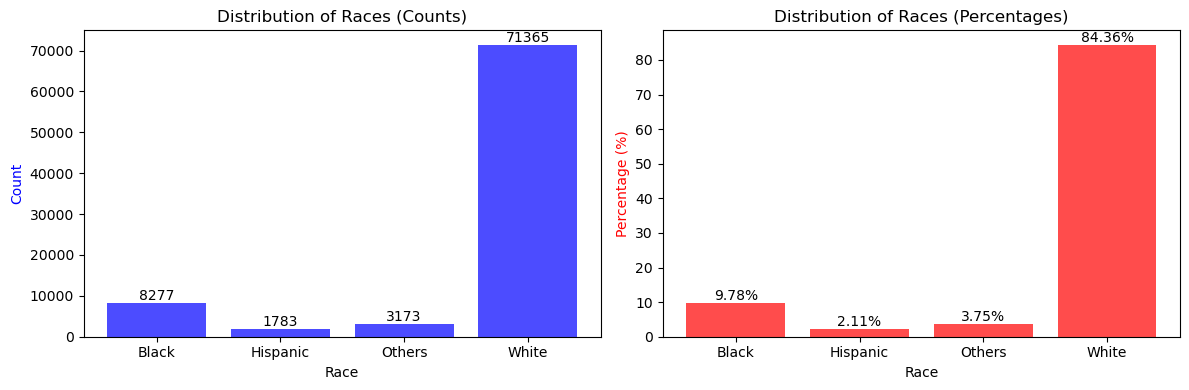

In [187]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar chart (counts)
ax1.bar(race_counts.index, race_counts, color='b', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='b')
ax1.set_title('Distribution of Races (Counts)')

# Add values on top of bars for the first chart
for i, v in enumerate(race_counts):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Plot the second bar chart (percentages)
ax2.bar(race_counts.index, race_percentages, color='r', alpha=0.7, label='Percentage')
ax2.set_xlabel('Race')
ax2.set_ylabel('Percentage (%)', color='r')
ax2.set_title('Distribution of Races (Percentages)')

# Add values on top of bars for the second chart
for i, v in enumerate(race_percentages):
    ax2.text(i, v , f'{v:.2f}%', ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [188]:
## What is the most common chronic illness combination?

diagnoses_counts = merged_df.groupby('Diagnoses')['DESYNPUF_ID'].nunique()

# Calculate percentage of total
diagnoses_percentages = diagnoses_counts / diagnoses_counts.sum() * 100

summary_table = pd.DataFrame({
    'Count': diagnoses_counts,
    'Percentage': diagnoses_percentages.apply(lambda x: '{:.2f}%'.format(x))  # format %
})

summary_table = summary_table.sort_values(by='Count', ascending=False) 

display(summary_table.head(5))

,Count,Percentage
Diagnoses,,
Multiple,79914,94.46%
"SP_CNCR, SP_OSTEOPRS, SP_STRKETIA",341,0.40%
"SP_CNCR, SP_STRKETIA",317,0.37%
"SP_CNCR, SP_RA_OA, SP_STRKETIA",270,0.32%
"SP_CNCR, SP_COPD, SP_STRKETIA",205,0.24%


In [189]:
## Which chronic illness combination has the total highest cost?
# Assuming 'CLM_PMT_AMT' is the correct value to use here

# Group by 'Diagnoses' and calculate the sum of 'CLM_PMT_AMT'
diagnoses_cost_total = merged_df.groupby('Diagnoses')['CLM_PMT_AMT'].sum().reset_index()

# Sort descending 
diagnoses_cost_total_sorted = diagnoses_cost_total.sort_values(by='CLM_PMT_AMT', ascending=False)

display(diagnoses_cost_total_sorted.head(5))


,Diagnoses,CLM_PMT_AMT
0,Multiple,195539910.00
129,"SP_CNCR, SP_RA_OA, SP_STRKETIA",1987530.00
130,"SP_CNCR, SP_STRKETIA",1733310.00
127,"SP_CNCR, SP_OSTEOPRS, SP_STRKETIA",1727380.00
126,"SP_CNCR, SP_OSTEOPRS, SP_RA_OA",1299020.00


In [190]:
## Which chronic illness combination has the highest cost per member?
# (total cost per illness combo) /(count of members per illness combo) 

# First, let's merge cost and count by Diagnoses
illness_cost_per_member = diagnoses_cost_total.merge(diagnoses_counts, how = 'left', on ='Diagnoses' )

# Compute cost per member
illness_cost_per_member['Cost_per_member'] = illness_cost_per_member['CLM_PMT_AMT']/illness_cost_per_member['DESYNPUF_ID']

# sort
illness_cost_per_member_sorted = illness_cost_per_member.sort_values(by='Cost_per_member', ascending=False).reset_index()

display(illness_cost_per_member_sorted.head(5))


# Osteoporosis and rheumatoid arthritis/osteoarthritis combo is most costly per member

,index,Diagnoses,CLM_PMT_AMT,DESYNPUF_ID,Cost_per_member
0,115,"SP_CNCR, SP_DEPRESSN, SP_RA_OA",604340.00,50,12086.80
1,23,"SP_ALZHDMTA, SP_CNCR, SP_RA_OA",315220.00,27,11674.81
2,172,"SP_OSTEOPRS, SP_RA_OA",443590.00,40,11089.75
3,124,"SP_CNCR, SP_ISCHMCHT, SP_STRKETIA",59090.00,6,9848.33
4,1,No Chronic Condition,324670.00,33,9838.48


4.	Benchmarking

In [191]:
## For each provider (use AT_PHYSN_NPI) & chronic illness, calculate the cost per member.
pd.options.display.float_format = '{:.2f}'.format
# First, let's calculate total cost per provider and diagnosis
provider_diagnoses_cost = merged_df.groupby(['AT_PHYSN_NPI', 'Diagnoses', ])['CLM_PMT_AMT'].sum().reset_index()

# Next, let's calculate unique members per provider and diagnosis
provider_diagnoses_members = merged_df.groupby(['AT_PHYSN_NPI', 'Diagnoses', ])['DESYNPUF_ID'].nunique().reset_index()

# now merge both
cost_per_member_per_diagnosis = provider_diagnoses_members.merge(provider_diagnoses_cost, how = 'left', on =['AT_PHYSN_NPI','Diagnoses'] )

# Compute cost per provider per illness per member
cost_per_member_per_diagnosis['cost_per_member'] = cost_per_member_per_diagnosis['CLM_PMT_AMT']/cost_per_member_per_diagnosis['DESYNPUF_ID']

cost_per_member_per_diagnosis = cost_per_member_per_diagnosis.sort_values(by='cost_per_member', ascending=False).reset_index()


display(cost_per_member_per_diagnosis.head(5))
# Compute cost per member

,index,AT_PHYSN_NPI,Diagnoses,DESYNPUF_ID,CLM_PMT_AMT,cost_per_member
0,54414,3678418115.00,No Chronic Condition,1,50900.00,50900.00
1,75861,5125628269.00,"SP_ALZHDMTA, SP_OSTEOPRS, SP_RA_OA",1,24000.00,24000.00
2,146010,9900357368.00,"SP_COPD, SP_OSTEOPRS, SP_STRKETIA",1,22150.00,22150.00
3,75868,5125628269.00,"SP_CNCR, SP_STRKETIA",1,20270.00,20270.00
4,40394,2750068694.00,SP_CNCR,1,16010.00,16010.00


In [192]:
# Let's take a look at the total number of Providers and the number of unique diagnoses
display([cost_per_member_per_diagnosis['AT_PHYSN_NPI'].nunique(), cost_per_member_per_diagnosis['Diagnoses'].nunique()] )

[98504, 178]

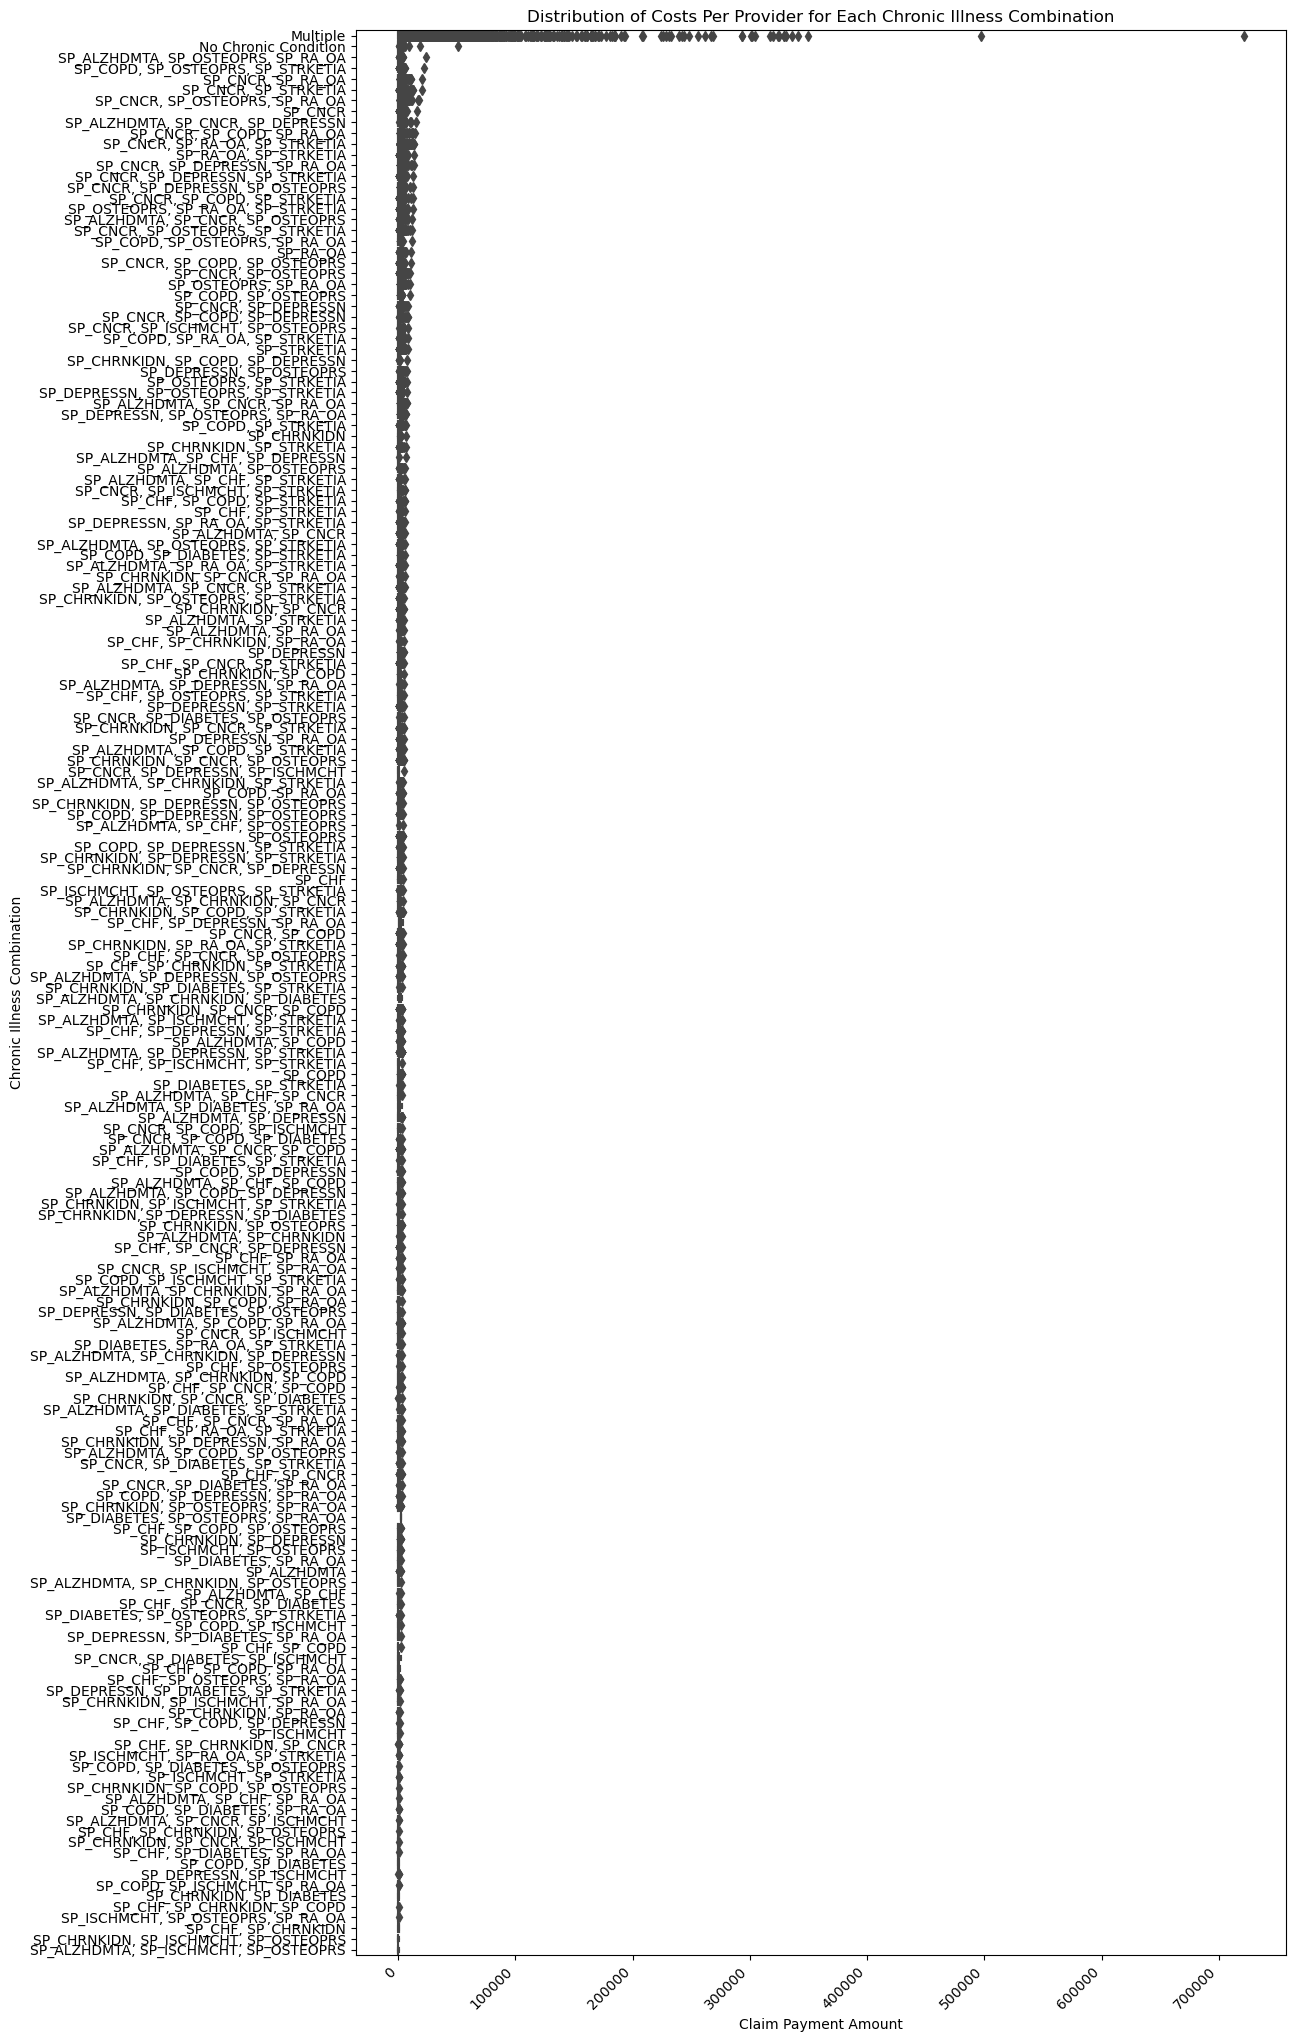

In [193]:
## For each chronic illness combination, represent the distribution of costs per provider.
cost_per_member_per_diagnosis_top =cost_per_member_per_diagnosis.head()
# boxplots
plt.figure(figsize=(12, 25))
sns.boxplot(y='Diagnoses', x='CLM_PMT_AMT', data=cost_per_member_per_diagnosis.sort_values(by='CLM_PMT_AMT', ascending=False).reset_index()) # reset sort order to 'CLM_PMT_AMT' descending
plt.title('Distribution of Costs Per Provider for Each Chronic Illness Combination')
plt.ylabel('Chronic Illness Combination')
plt.xlabel('Claim Payment Amount')

plt.xticks(rotation=45, ha='right')

plt.show()


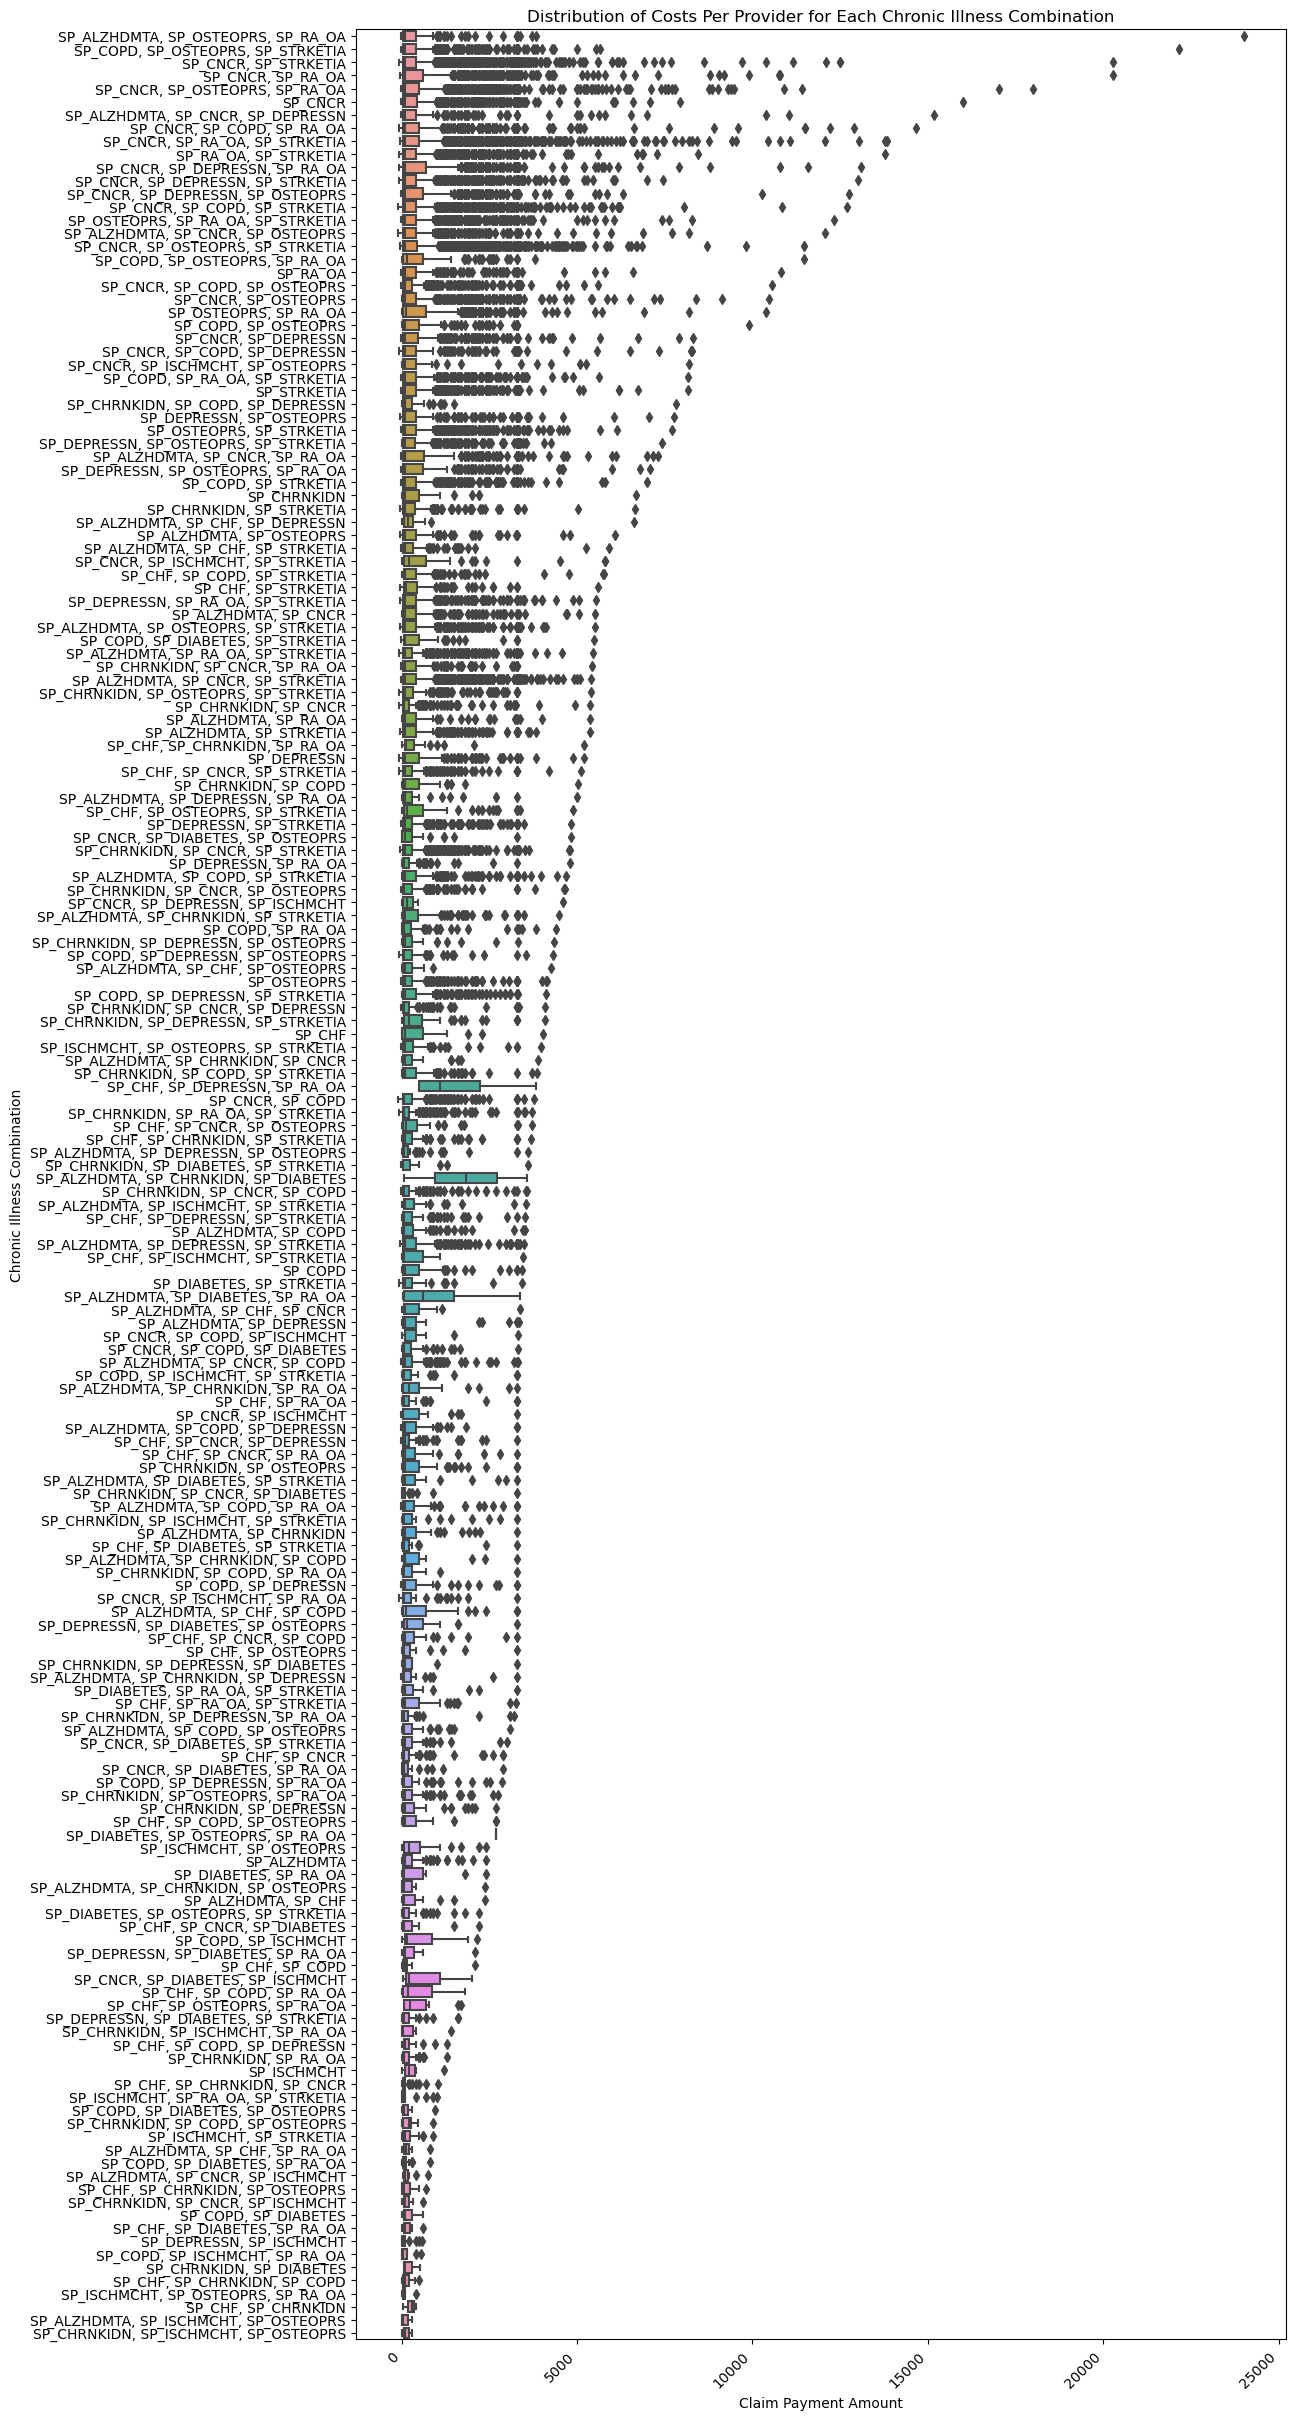

In [194]:
# the widest distributions occur in 'Multiple' and 'No Chronic Condition'
# Let's filter these out to get a better overview

# Filter out 'multiple' and 'No Condition Identified'
filtered_data = cost_per_member_per_diagnosis[
    ~cost_per_member_per_diagnosis['Diagnoses'].isin(['Multiple', 'No Chronic Condition'])
]


# Boxplots
plt.figure(figsize=(12, 30))
sns.boxplot(y='Diagnoses', x='CLM_PMT_AMT', data=filtered_data.sort_values(by='CLM_PMT_AMT', ascending=False).reset_index())
plt.title('Distribution of Costs Per Provider for Each Chronic Illness Combination')
plt.ylabel('Chronic Illness Combination')
plt.xlabel('Claim Payment Amount')

plt.xticks(rotation=45, ha='right')

plt.show()

[53952, 69]

,index,AT_PHYSN_NPI,Diagnoses,DESYNPUF_ID,CLM_PMT_AMT,cost_per_member
31,77718,5255686079.00,"SP_CNCR, SP_RA_OA",2,20270.00,10135.00
37,47864,3246308347.00,No Chronic Condition,2,18670.00,9335.00
41,17786,1224334981.00,"SP_CNCR, SP_OSTEOPRS, SP_RA_OA",2,18000.00,9000.00
46,56841,3842319778.00,"SP_CNCR, SP_OSTEOPRS, SP_RA_OA",2,17020.00,8510.00
63,139599,9453890658.00,Multiple,2,15260.00,7630.00


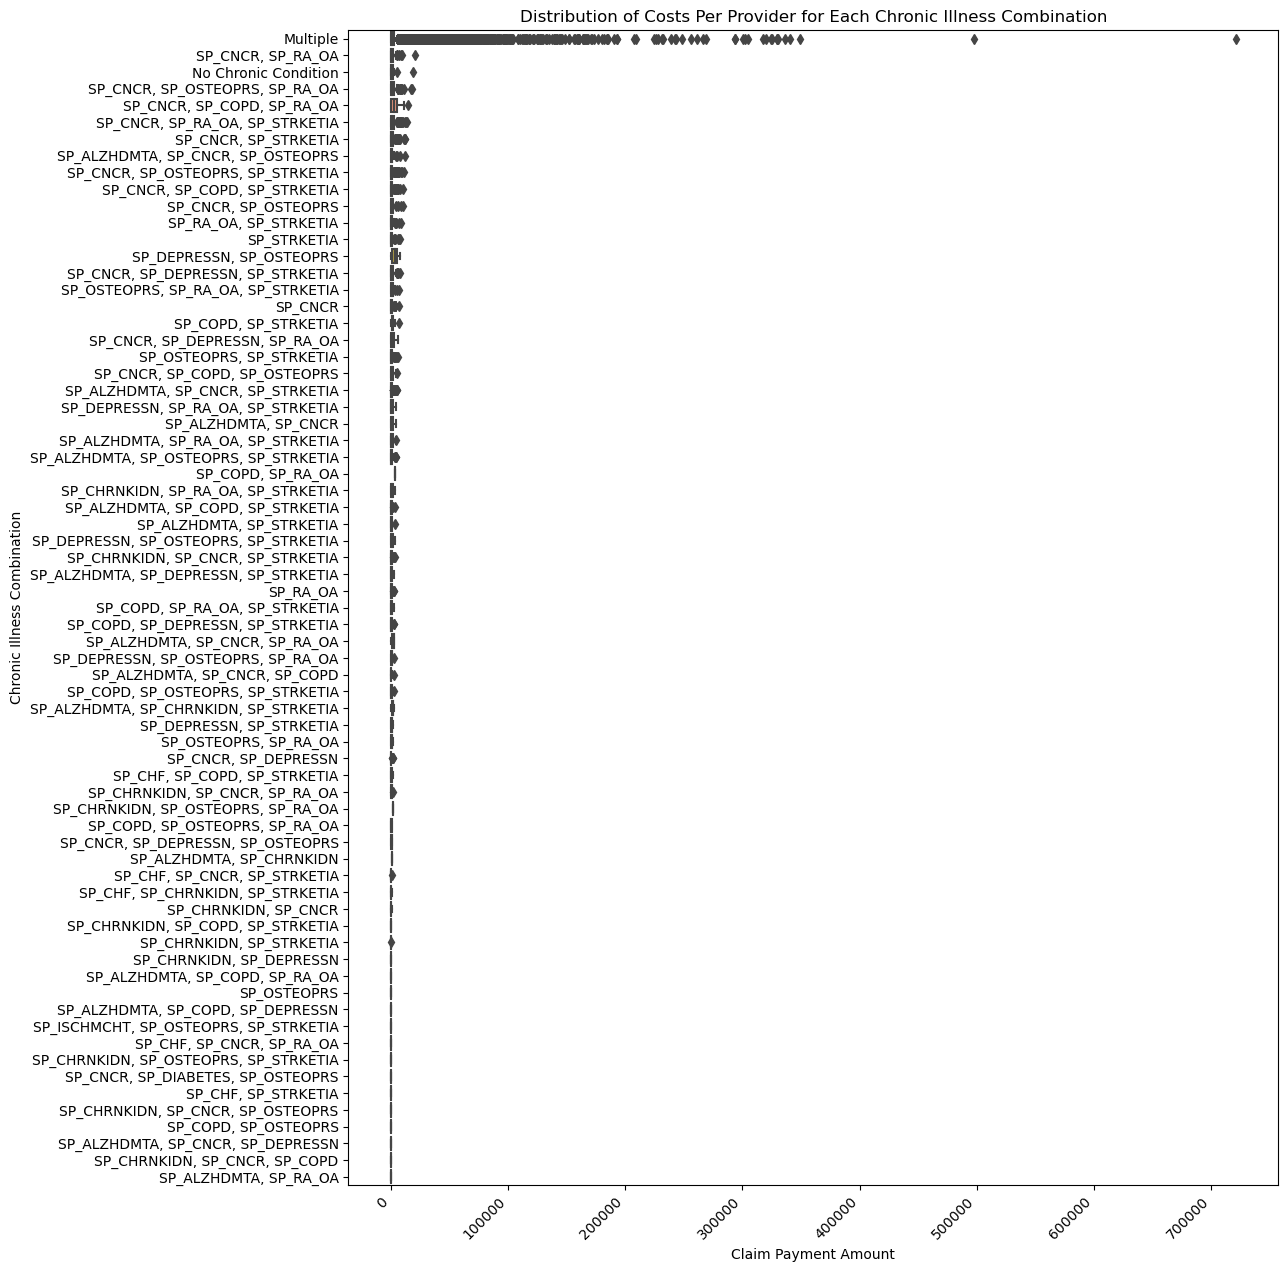

In [195]:
## How does this change if we filter out cases where a given Chronic Illness & Provider NPI combination only has 1 member?

# Filter cost_per_member_per_diagnosis 
multiple_members =  cost_per_member_per_diagnosis.loc[cost_per_member_per_diagnosis['DESYNPUF_ID'] != 1]


# Let's see total number of Providers and the number of unique diagnoses changes
display([multiple_members['AT_PHYSN_NPI'].nunique(), multiple_members['Diagnoses'].nunique()] )

display(multiple_members.head())

plt.figure(figsize=(12, 15))
sns.boxplot(y='Diagnoses', x='CLM_PMT_AMT', data=multiple_members.sort_values(by='CLM_PMT_AMT', ascending=False).reset_index()) # reset sort order to 'CLM_PMT_AMT' descending
plt.title('Distribution of Costs Per Provider for Each Chronic Illness Combination')
plt.ylabel('Chronic Illness Combination')
plt.xlabel('Claim Payment Amount')

plt.xticks(rotation=45, ha='right')

plt.show()

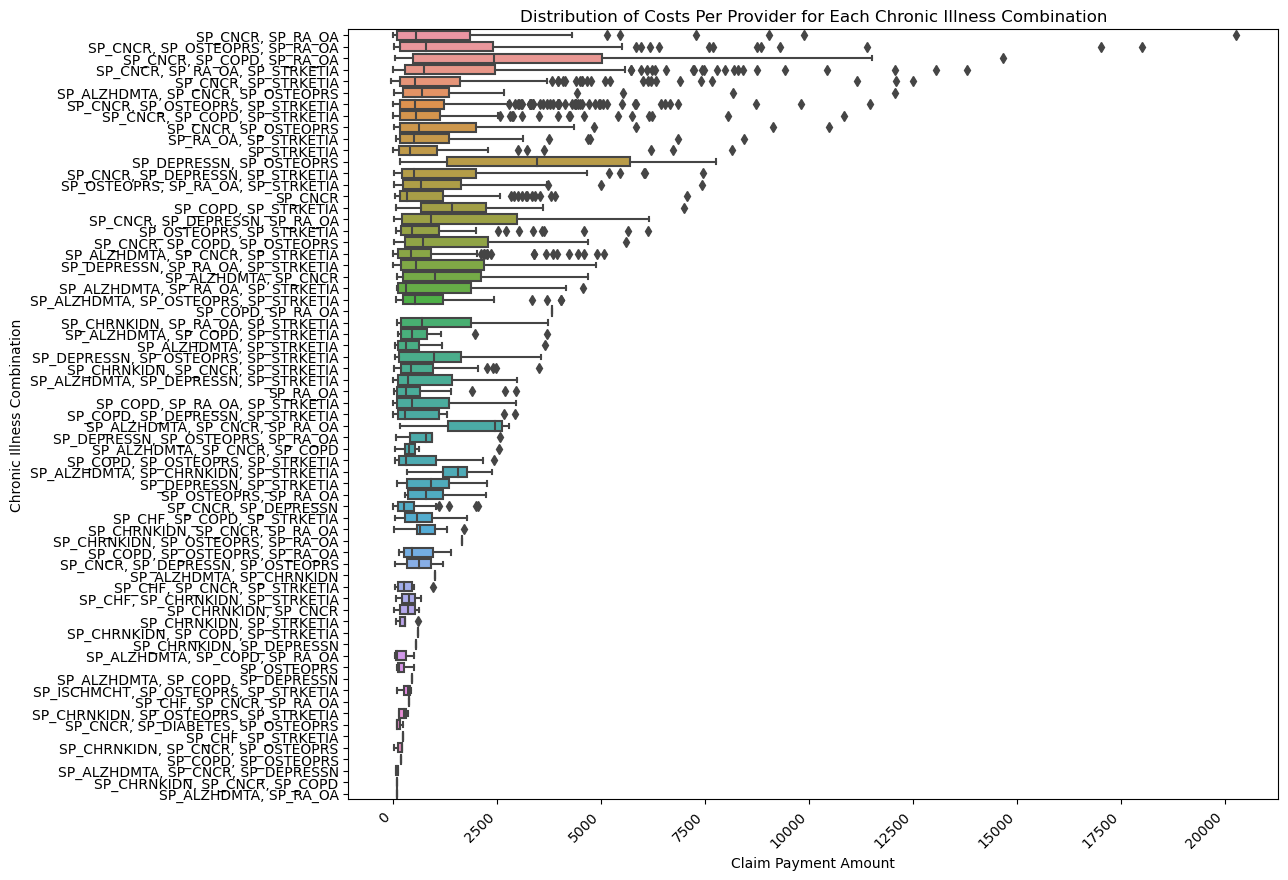

In [196]:
# Lets filter out 'Multiple' and 'No Chronic Condition' again

multiple_members_filtered = multiple_members[
    ~multiple_members['Diagnoses'].isin(['Multiple', 'No Chronic Condition'])
]
plt.figure(figsize=(12, 10))
sns.boxplot(y='Diagnoses', x='CLM_PMT_AMT', data=multiple_members_filtered.sort_values(by='CLM_PMT_AMT', ascending=False).reset_index()) # reset sort order to 'CLM_PMT_AMT' descending
plt.title('Distribution of Costs Per Provider for Each Chronic Illness Combination')
plt.ylabel('Chronic Illness Combination')
plt.xlabel('Claim Payment Amount')

plt.xticks(rotation=45, ha='right')

plt.show()

In [197]:
## Which providers are consistently expensive across chronic illnesses they treat?

# We will approach this by computing the mean cost per member for each provider

# Calculate average cost per member for each provider and illness combination
average_costs_per_illness = cost_per_member_per_diagnosis.groupby(['AT_PHYSN_NPI', 'Diagnoses'])['cost_per_member'].mean().reset_index()

# Rank providers for each illness based on average cost 
top_providers_per_diagnosis = (
    average_costs_per_illness.groupby('Diagnoses')
    .apply(lambda x: x.nlargest(3, 'cost_per_member')) # top 3 providers
    .reset_index(drop=True)
)


# Count the number of occurrences of each provider in top_providers_per_diagnosis
provider_counts = top_providers_per_diagnosis['AT_PHYSN_NPI'].value_counts().sort_values(ascending=False).reset_index()

# Display the provider counts
print("Number of Occurrences for Each Provider in Top Providers:")
display(provider_counts)


Number of Occurrences for Each Provider in Top Providers:


,AT_PHYSN_NPI,count
0,9943567290.00,3
1,1586461282.00,3
2,5695474522.00,3
3,2199246172.00,3
4,5494871486.00,3
...,...,...
480,662341025.00,1
481,3430772681.00,1
482,8217635740.00,1
483,1339988309.00,1


In [198]:
# The count of Occurrences (i.e. the number of conditions for which each provider is above average cost) is not especially \
# informative without the context of how many unique conditions each provider covers

# Therefore, we will calculate the propotion of covered conditions which are above average cost

# First, get unique conditions per provider
unique_diagnoses_counts = cost_per_member_per_diagnosis.groupby('AT_PHYSN_NPI')['Diagnoses'].nunique().reset_index()
unique_diagnoses_counts.columns = ['AT_PHYSN_NPI', 'Unique_Diagnoses_Count']

# Merge with the provider_counts df
merged_counts = pd.merge(provider_counts, unique_diagnoses_counts, on='AT_PHYSN_NPI', how='left')

# Compute the proportion
merged_counts['affordability_rating'] = merged_counts['count']/merged_counts['Unique_Diagnoses_Count']

print("Merged DataFrame with Counts and Unique Diagnoses:")
display(merged_counts.sort_values(by='affordability_rating', ascending=False).reset_index().head(10))


Merged DataFrame with Counts and Unique Diagnoses:


,index,AT_PHYSN_NPI,count,Unique_Diagnoses_Count,affordability_rating
0,155,1909641545.00,1,1,1.00
1,113,9199023776.00,1,1,1.00
2,403,9784202468.00,1,1,1.00
3,247,2356493004.00,1,1,1.00
4,47,2861047714.00,1,1,1.00
5,48,5532434557.00,1,1,1.00
6,286,4776495199.00,1,1,1.00
7,240,7175982094.00,1,1,1.00
8,163,3800453461.00,1,1,1.00
9,319,1764177271.00,1,1,1.00


In [200]:
# it seems that a number of providers only cover a single condition and are most costly for that condtiton.
# Let's filter these out for a broader view

filtered_merged_counts = merged_counts[merged_counts['Unique_Diagnoses_Count'] > 1]

display(filtered_merged_counts.sort_values(by='affordability_rating', ascending=False).reset_index().head(10))


# Among providers who treat more than one condition, the highest proportion is 0.5. 

,index,AT_PHYSN_NPI,count,Unique_Diagnoses_Count,affordability_rating
0,239,509668500.00,1,2,0.50
1,266,7994375618.00,1,2,0.50
2,99,9609790099.00,1,2,0.50
3,229,6278068272.00,1,2,0.50
4,95,5786000879.00,1,2,0.50
5,232,2069058964.00,1,2,0.50
6,244,101731545.00,1,2,0.50
7,245,2300781390.00,1,2,0.50
8,246,3683552594.00,1,2,0.50
9,259,8103648856.00,1,2,0.50


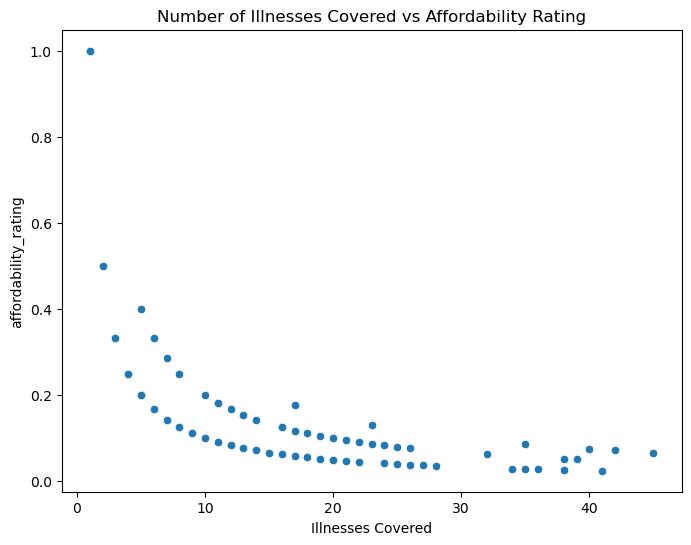

In [201]:
# scatter these two quantites against one another
# they appear to follow an inverse power law

plt.figure(figsize=(8, 6))
sns.scatterplot(y='affordability_rating', x='Unique_Diagnoses_Count', data=merged_counts) 
plt.title('Number of Illnesses Covered vs Affordability Rating')
plt.ylabel('affordability_rating')
plt.xlabel('Illnesses Covered')



plt.show()